Integrantes:
Lina Maria Chavarro Meza     CC: 1193516928  
     Yuli Fernanda Ruiz Goyes               CC:                                                                    Maria Alejandra Gonzalez Duque

In [ ]:
### LIBRERIAS
#@title LIBRERIAS IMPORTADAS { run: "auto" }
## librerias para el funcionamiento del paquete

import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings("ignore", message="""Caught 'unbalanced parenthesis at position 119' compiling regex""", category=UserWarning )
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
# Bin continuous data into intervals.
from sklearn.base import BaseEstimator, TransformerMixin
from numpy.lib.shape_base import apply_over_axes

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import os
import sys
import pandas as pd
# import pandas_datareader.data as web

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

from statsmodels.tsa import ar_model, arima_process, arima, arima_model
from statsmodels.tsa.ar_model import AutoReg
#!pip install numpy scipy patsy pandas
#!pip install statsmodels --upgrade

<ipython-input-1-cb3382259663>:38: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [ ]:
class MVE():
  """
  
        class that is in charge of handling the estimation by maximum likelihood, 
        for which 3 parameters are entered:
         --------------------------------------
         --------------------------------------
         Parameters
         --------------------------------------------
         X_function_Estimate {ndarray} -- Array that have the function 
         that needs to be estimated under some probability model.

         plot{Boolean}-- Parameter that indicate if the user want to plot the 
         log likely hood function. [default:True]

         hist{Boolean}-- Parameter that indicate if the user want to plot the 
         histogram with the estimate function. [default:True]


  """
  def __init__(self,X_function_estimate: np.array,plot=True,hist=True):
    self.X_function_estimate=X_function_estimate
    self.plot=plot
    self.hist=hist
    self.N=len(self.X_function_estimate)

  def Exponencial(self,lambdas_limits: np.array, espace : float =0.10):
     """
      Function that make the MVE with a exponential distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      lambdas_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible landas.

      espace{float}--constant  for the spacing of the vector of means and variances

      Returns
      ---------------------------------------------------------------
      lambdas_estimate{float}-- THE ESTIMATED LAMBDAS FOR THE FUNCTION 
      exponential_estimate{np.array}-- THE ESTIMATED DISTRIBUTION

      
     """  
     lambdas= np.arange(lambdas_limits[0], lambdas_limits[1], espace)
     log_estimation=self.N*np.log(lambdas)-lambdas*np.sum(self.X_function_estimate)
     posicionmax=np.where( log_estimation== np.amax(log_estimation))
     lambda_estimate=lambdas[posicionmax]
     estimated_exponential=np.random.exponential(1/lambda_estimate,size=self.N)

     if(self.plot):
      plt.figure(figsize=(6,6))
      plt.plot(lambdas, log_estimation)
      plt.xlabel('$\lambda$')
      plt.ylabel('log likely hood')
      plt.plot(lambda_estimate,log_estimation[posicionmax],color="green",label="Lambda Estimated: {}".format(lambda_estimate),marker='o')
      plt.legend()
      plt.show()
     if(self.hist):
      Nbins = int(1 + 3.322*np.log2(self.N))
      plt.figure(figsize=(8,8))
      plt.hist(self.X_function_estimate,bins=Nbins,color="orange",label="Original")
      plt.hist(estimated_exponential,bins=Nbins,color="blue",label="Estimation-lambda{}".format(lambda_estimate))
      plt.legend()
      plt.title("original and estimated comparison")
      pl.show()
     return lambda_estimate, estimated_exponential

     

  def Poisson(self,lambdas_limits:np.array,espace : float =0.10):
    """
      Function that make the MVE with a Poisson distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      lambda_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible lambdas.

      espace{float}--constant  for the spacing of the vector of lambdas

      Returns
      ---------------------------------------------------------------
      lambda_estimate{float}-- THE ESTIMATED lambda FOR THE FUNCTION 
      estimated_poisson{np.array}-- THE ESTIMATED DISTRIBUTION

    """
    lam = np.arange(lambdas_limits[0], lambdas_limits[1], espace)
    log_est=-self.N*lam+np.log(lam)*np.sum(self.X_function_estimate)-np.sum(np.log(factorial(self.X_function_estimate)))
    p_max=np.where( log_est== np.amax(log_est))
    lambda_est=lam[p_max]
    estimated_poisson=np.random.poisson(lambda_est,self.N)
    if(self.plot):
      plt.figure(figsize=(6,6))
      plt.plot(lam, log_est)
      plt.xlabel('$\lambda$')
      plt.ylabel('log likely hood')
      plt.plot(lambda_est,log_est[p_max],color="green",label="Lambda Estimated: {}".format(lambda_est),marker='o')
      plt.legend()
      plt.show()
    if(self.hist):
      Nbins = int(1 + 3.322*np.log2(self.N))
      plt.figure(figsize=(8,8))
      plt.hist(self.X_function_estimate,bins=Nbins,color="orange",label="Original")
      plt.hist(estimated_poisson,bins=Nbins,color="blue",label="Estimation-lambda{}".format(lambda_est))
      plt.legend()
      plt.title("original and estimated comparison")
    
    return lambda_est,estimated_poisson
  

<ipython-input-2-215b86558e75>:46: RuntimeWarning: divide by zero encountered in log
  log_estimation=self.N*np.log(lambdas)-lambdas*np.sum(self.X_function_estimate)


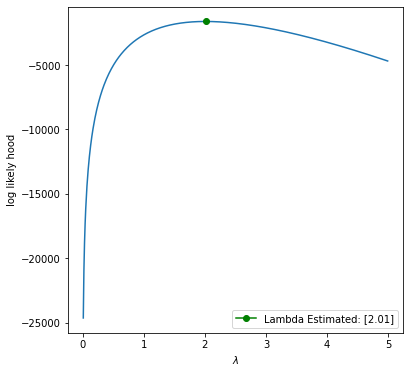

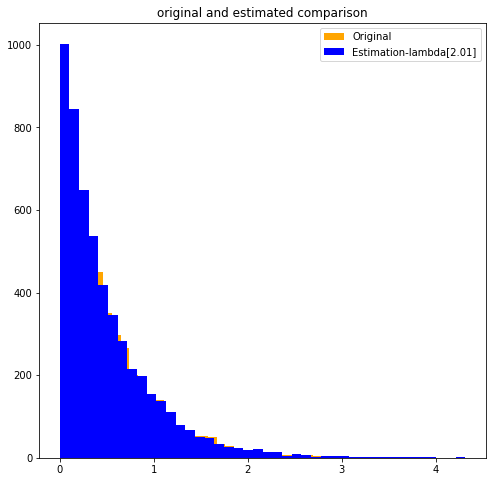

In [ ]:
if __name__=="__main__":

  """
  EXPONENTIAL
  """
  N =  5345 # // numero de muestras 

  #   parameter vector \theta=\mu, \sigma^2
  λ = 2
  V2 = np.pi/8 
  x = np.random.exponential(1/λ, N) ## FDP GAUSSIANA REAL   
  MVE1=MVE(x) ## TENGO MIS DATOS GUARDADOS 
 # Values_mean = np.array([μ-2*V2, μ+2*V2]) ##VECTOR DE MEDIAS 
  #Values_var = np.array([V2/2, 1.5*V2]) # VECTOR DE VARIANZAS
  espace=0.01
  Values_lambda = np.array([0, 5])
  lambda_estimate,estimated_exponential=MVE1.Exponencial(Values_lambda,espace)

<ipython-input-2-215b86558e75>:46: RuntimeWarning: divide by zero encountered in log
  log_estimation=self.N*np.log(lambdas)-lambdas*np.sum(self.X_function_estimate)


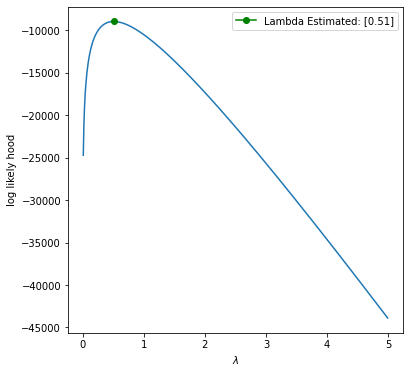

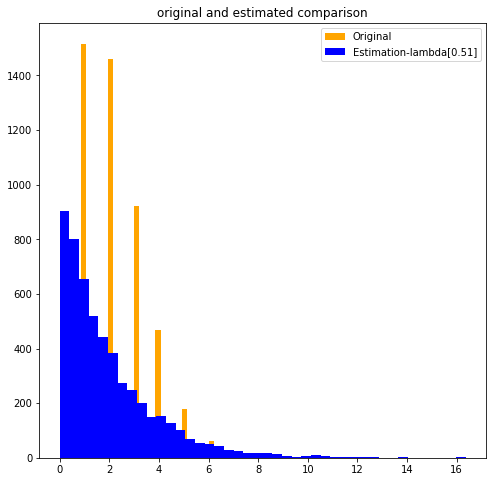

In [ ]:
if __name__=="__main__":

  """
  POISSON
  """
  N =  5345 # // numero de muestras 

  #   parameter vector \theta=\mu, \sigma^2
  lom = 2
  V2 = np.pi/8 
  x = np.random.poisson(lom, N) ## FDP GAUSSIANA REAL   
  MVE1=MVE(x) ## TENGO MIS DATOS GUARDADOS 
 # Values_mean = np.array([μ-2*V2, μ+2*V2]) ##VECTOR DE MEDIAS 
  #Values_var = np.array([V2/2, 1.5*V2]) # VECTOR DE VARIANZAS
  espace=0.01
  Values_lambda = np.array([0, 5])
  lambda_est,estimated_poisson=MVE1.Exponencial(Values_lambda,espace)